In [1]:
# Loading the data
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
# Print x_train and y_train
print(x_train)
print('x_train has shape: {}'.format(x_train.shape))
print('\n')
print(y_train)
print('y_train has shape: {}'.format(y_train.shape))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train has shape: (60000, 28, 28)


[5 0 4 ... 5 6 8]
y_train has shape: (60000,)


In [4]:
# Normalizing the data
norm_x_train = (x_train/252.0).reshape([-1,784])

In [5]:
# Extracting a small sample from the training data to inspect visually
sample_images, sample_labels = [],[]
for i, (img, lbl) in enumerate(zip(x_train, y_train)):
    sample_images.append(img)
    sample_labels.append(lbl)
    if i>=9: break

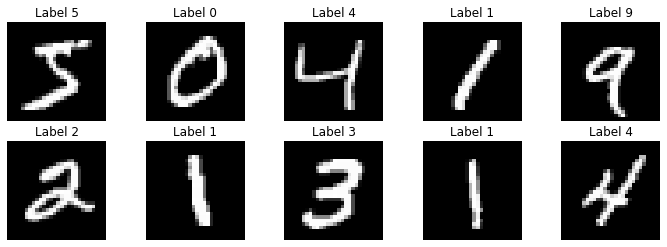

In [6]:
import matplotlib.pyplot as plt
# Plotting the images
f, axes = plt.subplots(2, 5, figsize=(12,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label {}".format(lbl))

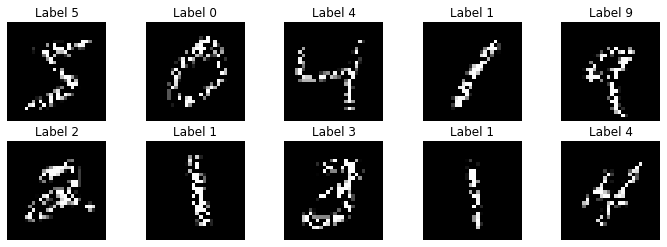

In [7]:
# Creating corrupted images
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_train_sample = x_train[:10]
y_train_sample = y_train[:10]

def generate_masked_inputs(x, p, seed=None):
    """ This function applies a binary mask to the input and generate corrupted images """
    # Fixing the seed
    if seed:
        np.random.seed(seed)
    # Generating a mask using the binomial distribution
    mask = np.random.binomial(n=1, p=p, size=x.shape).astype('float32')
    return x * mask

# Create a training dataset of corrupted images
masked_x_train_sample = generate_masked_inputs(x_train_sample, 0.5)

# Plotting some of the images
f, axes = plt.subplots(2, 5, figsize=(12,4))
for i, (img, lbl) in enumerate(zip(masked_x_train_sample, y_train_sample)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label {}".format(lbl))

In [8]:
# Defining the autoencoder model 
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K

K.clear_session()

# Defining the model
autoencoder = models.Sequential(
    [layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(784, activation='sigmoid')]
)

# Compiling the model
autoencoder.compile(loss='mse', optimizer='adam')

# Printing the model summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Training the model
# Generating the corrupted version of norm_x_train to be used as training inputs
masked_x_train = generate_masked_inputs(norm_x_train, 0.5, seed=1024)
# Fit the model
history = autoencoder.fit(masked_x_train, norm_x_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0470
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0279
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0245
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0228
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0216
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0207
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0201
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0196
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0192
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0188


Text(0.5, 1.0, 'Autoencoder reconstruction loss for MNIST dataset')

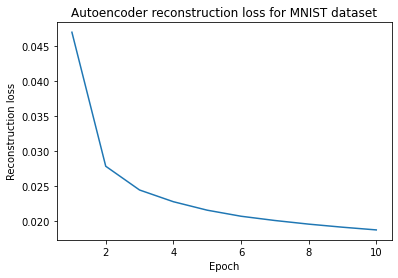

In [10]:
# Plotting the loss
plt.plot(np.arange(1,11), history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Reconstruction loss")
plt.title("Autoencoder reconstruction loss for MNIST dataset")

In [11]:
# Reconstructing corrupted images using the trained model 
# Using the first 10 samples in our dataset to test the model
x_train_sample = x_train[:10]
y_train_sample = y_train[:10]

# Generating corrupted images using a previously unseen mask
masked_x_train_sample = generate_masked_inputs(x_train_sample, 0.5, seed=2048)
norm_masked_x = (x_train/252.0).reshape(-1, 784)

# Predicting the restored images from corrupted images
y_pred = autoencoder.predict(norm_masked_x) 

In [12]:
print(y_pred)
print('y_pred has shape: {}'.format(y_pred.shape))

[[8.44551717e-09 1.18278082e-10 7.92529431e-10 ... 5.48441327e-11
  1.81469584e-09 4.04642631e-09]
 [1.33274245e-08 6.29020558e-10 1.78553961e-09 ... 9.88916504e-10
  2.99272673e-09 5.45507461e-08]
 [3.29573959e-06 2.48302149e-06 6.96183361e-06 ... 1.71871790e-07
  3.31275743e-07 6.33903937e-06]
 ...
 [5.49407488e-08 8.88538221e-09 3.54169103e-08 ... 3.83360099e-09
  9.45155065e-09 8.41200176e-08]
 [1.36176922e-07 4.81342539e-08 4.05031209e-08 ... 1.72110774e-07
  2.19808793e-08 2.21719304e-07]
 [3.54767991e-07 2.05085584e-07 3.40485030e-07 ... 3.24563871e-07
  1.19372260e-07 2.50931885e-06]]
y_pred has shape: (60000, 784)


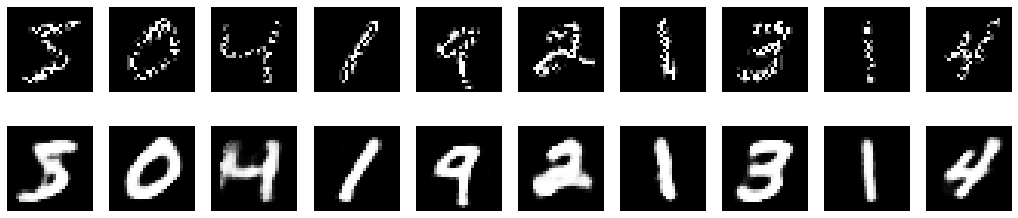

In [13]:
# Plotting the corrupted and restored images side-by-side
f, axes = plt.subplots(2, 10, figsize=(18,4))
for i, (img, res) in enumerate(zip(masked_x_train_sample, y_pred)):
    r1, c1 = 0, i
    r2, c2 = 1, i
    axes[r1,c1].imshow(img,cmap='gray')
    axes[r1,c1].axis('off')
    
    res = (res *252.0).reshape(28,28)
    axes[r2,c2].imshow(res,cmap='gray')
    axes[r2,c2].axis('off')